In [1]:
import scanpy as sc
import anndata
import plotting as pl
import tools as tl
import numpy as np
import time as time


Bad key "text.kerning_factor" on line 4 in
/home/felix/anaconda3/envs/pytometry/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


------------------

## Settings

In [2]:
n_neighbors = 20
beta = 100
beta_thresh = 1.5
teta = 50
num_scales = 3
imp_channels = [1, 3, 5, 7, 9, 13] # all channels with -H

--------------------------

## Loading data

In [10]:
filelocation =  r"../datasets/VBh_converted.h5ad"
adata = anndata.read_h5ad(filelocation)

----------------

## Preprocessing

In [4]:
imp_channels_names = list(adata.var_names.values[imp_channels])  # getting names of imp_channels
print(imp_channels_names)

['FSC-A', 'SSC-A', 'CD8-FITC B525-FITC-A', 'CD3-PerCP-Cy5.5 B690-PC5.5-A', 'CD4-PE Y585-PE-A', 'CD19/20-A700 R712-APCA700-A']


In [5]:
sc.pp.subsample(adata, 0.05)  #subsample

adata = adata[:, imp_channels]

adata.X = np.arcsinh(adata.X / 10)  # normalize

print('Calculating %d nearest neighbors...'%n_neighbors)
t0 = time.time()
sc.pp.neighbors(adata, n_neighbors=20)  # k nearest neighbor graph
print('...done in %s s'%(time.time()-t0))

Calculating 20 nearest neighbors...
...done in 8.900672912597656 s


--------------------

## Calculate embedding

In [6]:
print('Calculating embedding of %d scales...'%num_scales)
t0 = time.time()
tl.hsne(adata, num_scales=num_scales)
print('...done in %s s'%(time.time()-t0))

Calculating embedding of 3 scales...
...done in 631.8131811618805 s


--------------------------

## Plotting

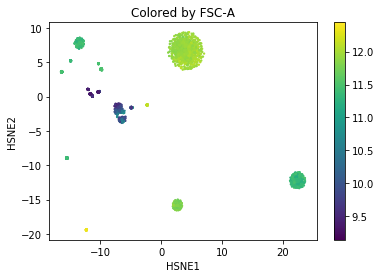

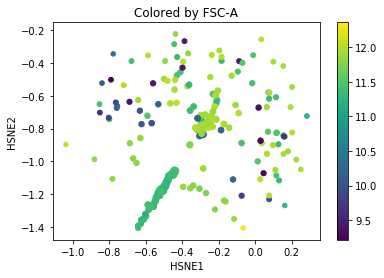

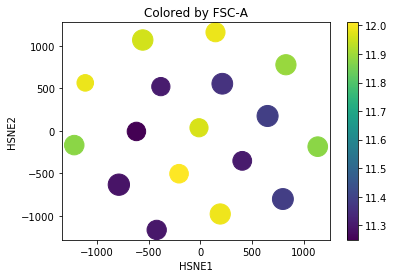

In [7]:
for scale in enumerate(adata.uns['hsne_scales']):
    pl.hsne(adata, channels_to_plot=['FSC-A'], scale_num=scale[0])

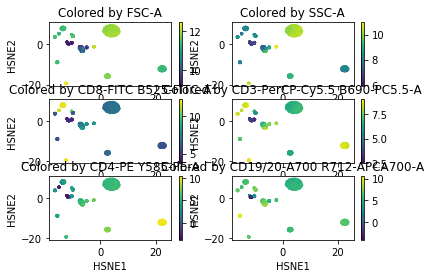

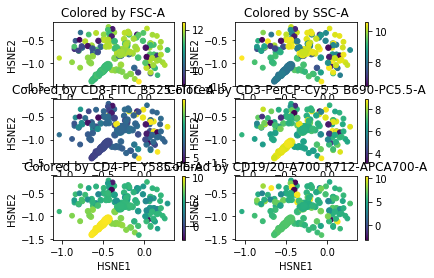

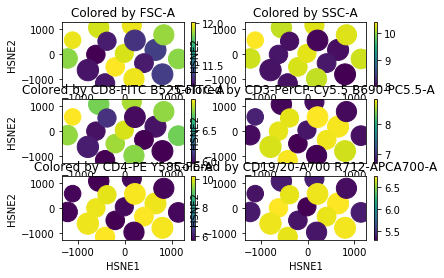

In [8]:
for scale in enumerate(adata.uns['hsne_scales']):
    pl.hsne(adata, scale_num=scale[0])

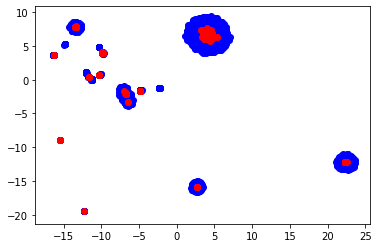

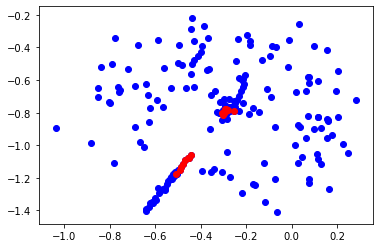

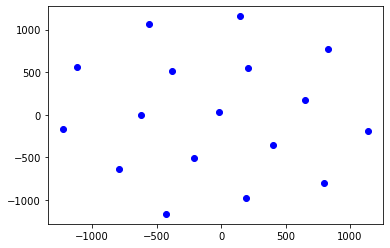

In [9]:
import matplotlib.pyplot as plt
scales = adata.uns['hsne_scales']
for s in scales:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(s.X_hsne[:, 0], s.X_hsne[:, 1], c='blue')
    ax.scatter(s.X_hsne[s.lm_ind, 0], s.X_hsne[s.lm_ind, 1], c='red')
    plt.show()